# Analyzing Amazon Product Reviews

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

In [50]:
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [51]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [52]:
# Get the numerical columns
numerical_columns = df.select_dtypes(include=['int','float']).columns.tolist()
print(numerical_columns)

['reviews.id', 'reviews.numHelpful', 'reviews.rating']


In [53]:
# Compute summary statistics
summary_stats=df[numerical_columns].describe()
print(summary_stats)

         reviews.id  reviews.numHelpful  reviews.rating
count  4.100000e+01        16115.000000    28332.000000
mean   1.840066e+08            0.529321        4.514048
std    2.337036e+07            9.345017        0.934957
min    1.116244e+08            0.000000        1.000000
25%    1.843344e+08            0.000000        4.000000
50%    1.885078e+08            0.000000        5.000000
75%    1.988160e+08            0.000000        5.000000
max    2.085304e+08          621.000000        5.000000


In [54]:
# Check for missing values in the DataFrame
missing_values = df.isna().sum()
print(missing_values)

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           5
sourceURLs                 0
dtype: int64


In [55]:
# Identify rows with missing reviews.id
missing_ids = df['reviews.id'].isnull()
# Generate new IDs for the missing values based on row index
new_ids = range(1000000, 1000000 + missing_ids.sum())

# Fill the missing IDs with the newly generated IDs
df.loc[missing_ids, 'reviews.id'] = new_ids

# Convert the new IDs to integers
df['reviews.id'] = df['reviews.id'].astype(int)

# Display the DataFrame to verify the changes
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,1000000,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,1000001,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,1000002,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,1000003,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",AmazonBasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"AmazonBasics/hl002619,AmazonBasicsaaaperforman...",...,NaN,NaN,1000004,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [56]:
from textblob import TextBlob

# Function to analyze sentiment and generate values
def analyze_sentiment(review):
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity  # Sentiment score between -1 and 1
    if sentiment >= 0.2:  # Assuming sentiment score >= 0.2 is positive sentiment
        return True, True, 1  # Recommend, Purchased, Helpful
    else:
        return False, False, 0  # Not Recommend, Not Purchased, Not Helpful

# Apply sentiment analysis function to each review text
df['reviews.doRecommend'], df['reviews.didPurchase'], df['reviews.numHelpful'] = zip(*df['reviews.text'].apply(analyze_sentiment))

# Count the number of reviews that are not recommended
num_not_recommended = df['reviews.doRecommend'].value_counts()[False]

# Display the count of reviews that are not recommended
print("Number of reviews not recommended:", num_not_recommended)


Number of reviews not recommended: 8649


In [57]:
# Remove missing values of reviews.username since it's only 5
df.dropna(subset=['reviews.username'], inplace=True)

In [58]:
# Check if there are any more missing values in the DataFrame
missing_values = df.isna().sum()
print(missing_values)

id                     0
dateAdded              0
dateUpdated            0
name                   0
asins                  0
brand                  0
categories             0
primaryCategories      0
imageURLs              0
keys                   0
manufacturer           0
manufacturerNumber     0
reviews.date           0
reviews.dateSeen       0
reviews.didPurchase    0
reviews.doRecommend    0
reviews.id             0
reviews.numHelpful     0
reviews.rating         0
reviews.sourceURLs     0
reviews.text           0
reviews.title          0
reviews.username       0
sourceURLs             0
dtype: int64


In [59]:
# Check for Duplicates
dups = df[df.duplicated()]
dups

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs


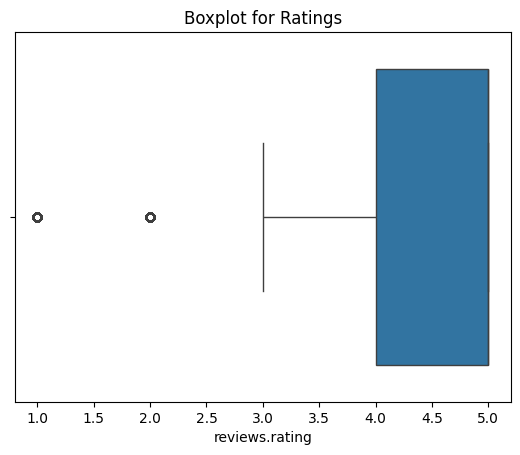

In [60]:
# Handle Outliers
sns.boxplot(x=df['reviews.rating'])
plt.title('Boxplot for Ratings')
plt.show()

In [61]:
# # Calculate the interquartile range (IQR)
# Q1 = df['reviews.rating'].quantile(0.25)
# Q3 = df['reviews.rating'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the threshold
# threshold = 1.5

# # Remove outliers
# df = df[(df['reviews.rating'] >= Q1 - threshold * IQR) & (df['reviews.rating'] <= Q3 + threshold * IQR)]


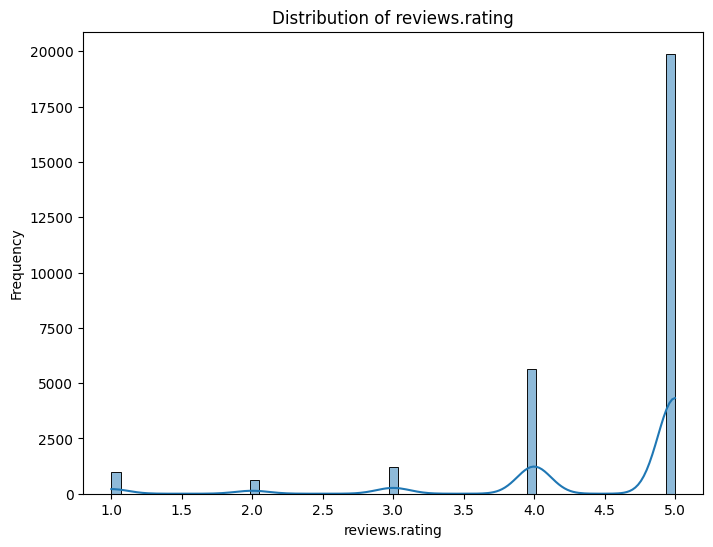

         reviews.id  reviews.numHelpful  reviews.rating
count  2.832700e+04        28327.000000    28327.000000
mean   1.279004e+06            0.694814        4.514068
std    7.012153e+06            0.460494        0.934903
min    1.000000e+06            0.000000        1.000000
25%    1.007082e+06            0.000000        4.000000
50%    1.014163e+06            1.000000        5.000000
75%    1.021246e+06            1.000000        5.000000
max    2.085304e+08            1.000000        5.000000


In [62]:
# Visualize distributions using histograms

num_columns = df[['reviews.rating']]
for column in num_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Calculate summary statistics
summary_stats = df.describe()

# Display summary statistics
print(summary_stats)

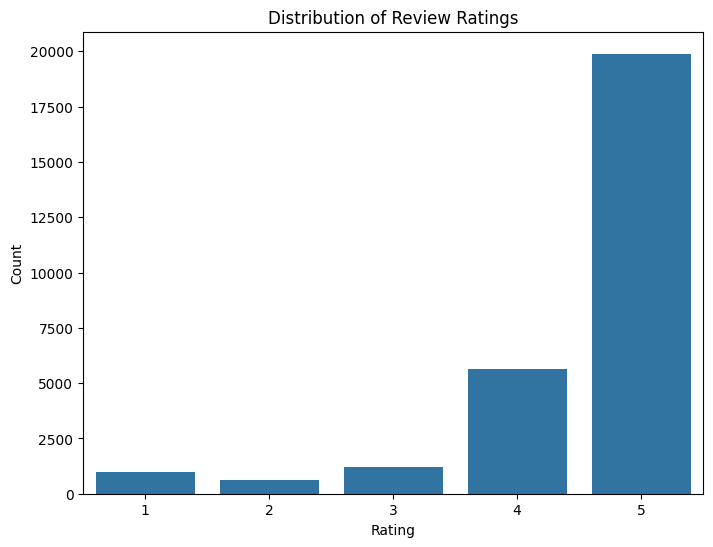

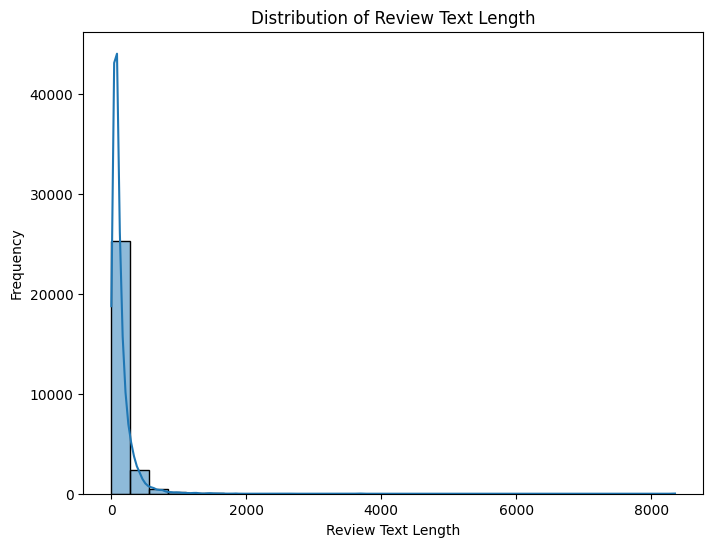

In [63]:
# Distribution of Reviews (Review Ratings)
plt.figure(figsize=(8, 6))
sns.countplot(x='reviews.rating', data=df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Review Text Length
df['review_text_length'] = df['reviews.text'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(df['review_text_length'], bins=30, kde=True)
plt.title('Distribution of Review Text Length')
plt.xlabel('Review Text Length')
plt.ylabel('Frequency')
plt.show()


In [64]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


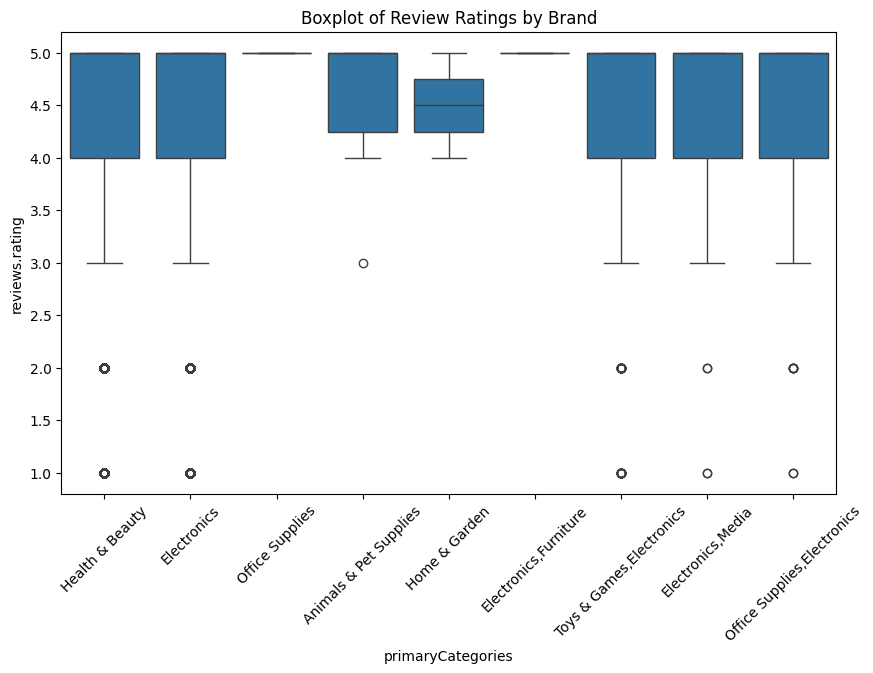

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='primaryCategories', y='reviews.rating', data=df)
plt.title('Boxplot of Review Ratings by Brand')
plt.xticks(rotation=45)
plt.show()


In [66]:
from collections import Counter

# Assuming 'reviews.text' contains the review text
review_text = df['reviews.text']

# Combine all review text into a single string
all_text = ' '.join(review_text)

# Tokenize the text into words
words = all_text.split()

# Calculate word frequency
word_freq = Counter(words)

# Print the most common words
print(word_freq.most_common(10))  # Change 10 to any number of top words you want to display


[('the', 25153), ('and', 21844), ('I', 19759), ('to', 19323), ('for', 17193), ('a', 17080), ('is', 11294), ('it', 10838), ('my', 9097), ('of', 8338)]


In [67]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    # Return sentiment polarity: positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review text
df['sentiment'] = df['reviews.text'].apply(get_sentiment)


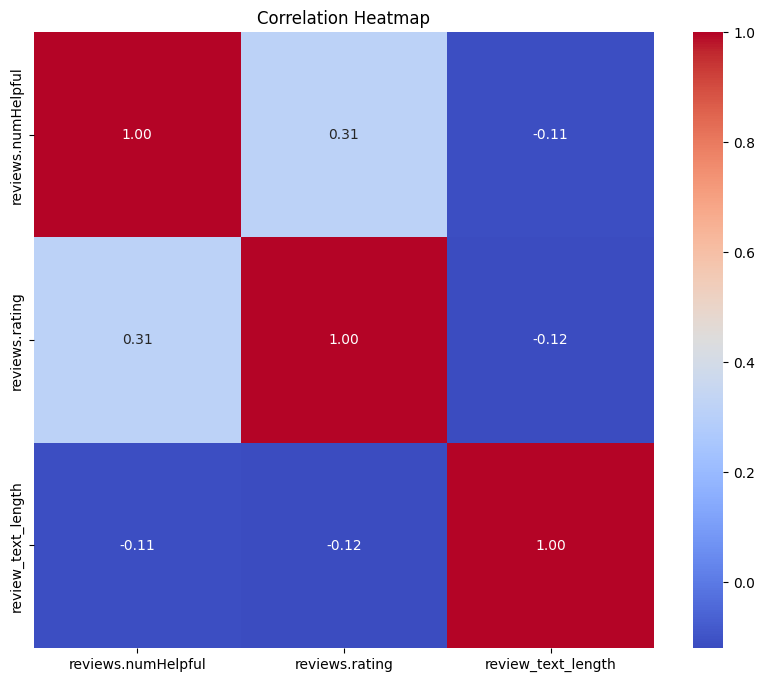

In [68]:
# Exclude non-numeric columns from the correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_columns.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\saron\AppData\Local\Temp\ipykernel_5856\1072165413.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['clean_text'] = positive_reviews['reviews.text'].apply(preprocess_text)
C:\Users\saron\AppData\Local\Temp\ipykernel_5856\1072165413.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

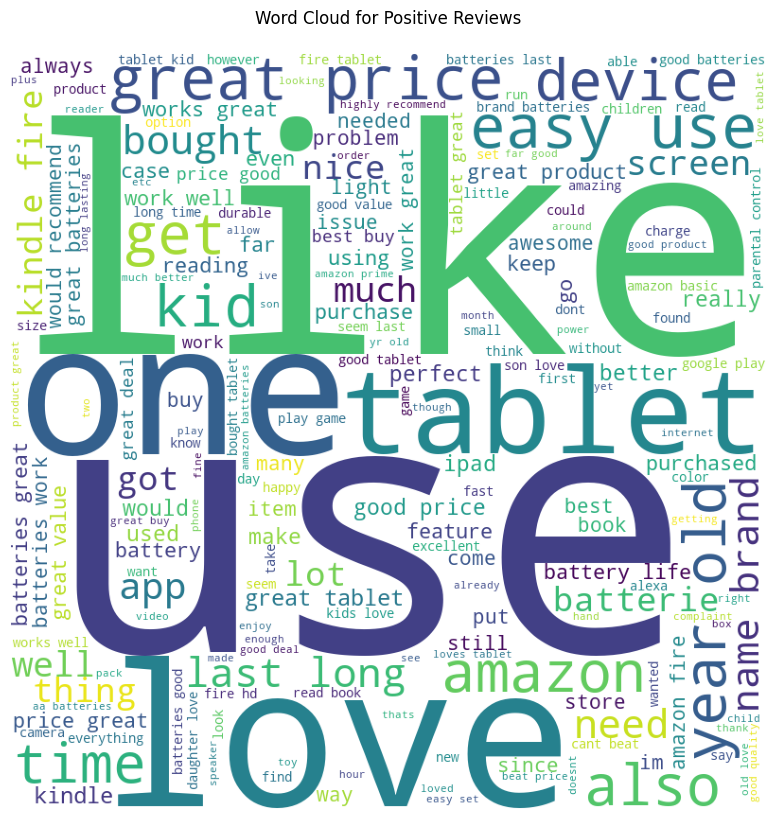

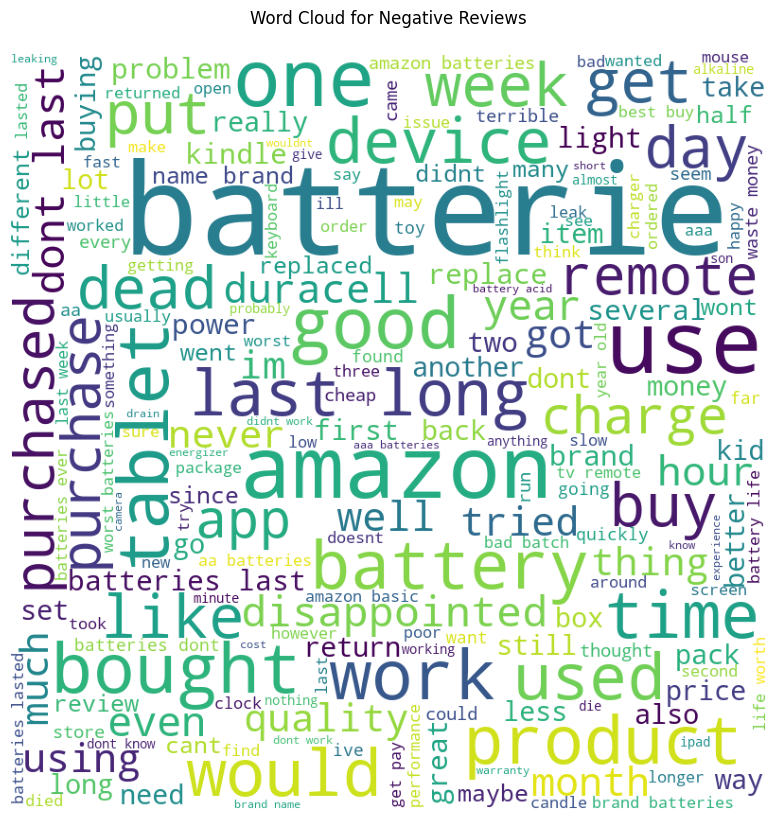

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

threshold = 3 

# Separate reviews into positive and negative categories
positive_reviews = df[df['reviews.rating'] >= threshold]  # Define threshold for positive reviews
negative_reviews = df[df['reviews.rating'] < threshold]

# Preprocess text data (example preprocessing, you might need more steps)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Apply preprocessing to reviews
positive_reviews['clean_text'] = positive_reviews['reviews.text'].apply(preprocess_text)
negative_reviews['clean_text'] = negative_reviews['reviews.text'].apply(preprocess_text)

# Calculate sentiment (example: using word lists)
positive_words = set(["good", "great", "excellent", "love", "awesome"])  # Example positive words
negative_words = set(["bad", "poor", "terrible", "disappointing", "awful"])  # Example negative words

def calculate_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_words)
    negative_count = sum(1 for word in text.split() if word in negative_words)
    if positive_count > negative_count:
        return 'positive'
    elif positive_count < negative_count:
        return 'negative'
    else:
        return 'neutral'

positive_reviews['sentiment'] = positive_reviews['clean_text'].apply(calculate_sentiment)
negative_reviews['sentiment'] = negative_reviews['clean_text'].apply(calculate_sentiment)

# Generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(text)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title(title)
    plt.tight_layout(pad = 0) 

# Generate word cloud for positive reviews
positive_text = " ".join(review for review in positive_reviews['clean_text'])
generate_word_cloud(positive_text, 'Word Cloud for Positive Reviews\n')

# Generate word cloud for negative reviews
negative_text = " ".join(review for review in negative_reviews['clean_text'])
generate_word_cloud(negative_text, 'Word Cloud for Negative Reviews\n')

plt.show()


In [70]:
# Preprocessing the data
X = df['reviews.text']
y = df['reviews.rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the pipeline for text classification
model = make_pipeline(
    TfidfVectorizer(),
    SVC(kernel='linear')
)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Displaying the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7820331803741617
Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.67      0.69       188
           2       0.61      0.24      0.35       127
           3       0.52      0.22      0.31       229
           4       0.71      0.28      0.40      1116
           5       0.80      0.98      0.88      4006

    accuracy                           0.78      5666
   macro avg       0.67      0.48      0.53      5666
weighted avg       0.76      0.78      0.74      5666



The results of the text classification model indicate an overall accuracy of 78.2%. The classification report provides insights into the precision, recall, and F1-score for each rating class. The precision represents the proportion of correctly predicted instances for each class among all instances predicted for that class, while recall indicates the proportion of correctly predicted instances for each class among all instances of that class in the dataset. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

In this case, the model performs well in predicting class 5 (rating 5) reviews, with high precision, recall, and F1-score values, indicating its effectiveness in identifying positive reviews. However, the performance deteriorates for lower-rated reviews (classes 1, 2, and 3), as reflected by lower precision, recall, and F1-score values. This suggests potential challenges in accurately classifying nuanced sentiments in lower-rated reviews. Overall, while the model demonstrates good performance in identifying positive sentiments, further refinement may be necessary to improve its accuracy in classifying lower-rated reviews.

In [71]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorizer
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # RandomForestClassifier
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['reviews.text'], df['reviews.rating'], test_size=0.2, random_state=42)

# Handle class imbalance with random oversampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

# Train the pipeline
pipeline.fit(X_train_resampled.squeeze(), y_train_resampled)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8436286621955524
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.47      0.61       188
           2       0.93      0.43      0.58       127
           3       0.76      0.52      0.62       229
           4       0.83      0.59      0.69      1116
           5       0.85      0.96      0.90      4006

    accuracy                           0.84      5666
   macro avg       0.84      0.59      0.68      5666
weighted avg       0.84      0.84      0.83      5666



The classification report reveals that the model achieves an overall accuracy of 84.4%, indicating its ability to correctly classify reviews into their respective rating classes. While the precision, recall, and F1-score for class 5 (positive reviews) are high, suggesting the model's proficiency in identifying positive instances, the performance diminishes for lower rating classes (1, 2, and 3). Particularly, the model struggles to correctly classify instances in these classes, as evidenced by lower precision, recall, and F1-score values. This implies a potential bias towards positive reviews or challenges in distinguishing nuanced sentiments in lower-rated reviews. Despite these limitations, the model demonstrates promising performance overall, suggesting its utility in automating the classification of customer reviews into different sentiment categories.







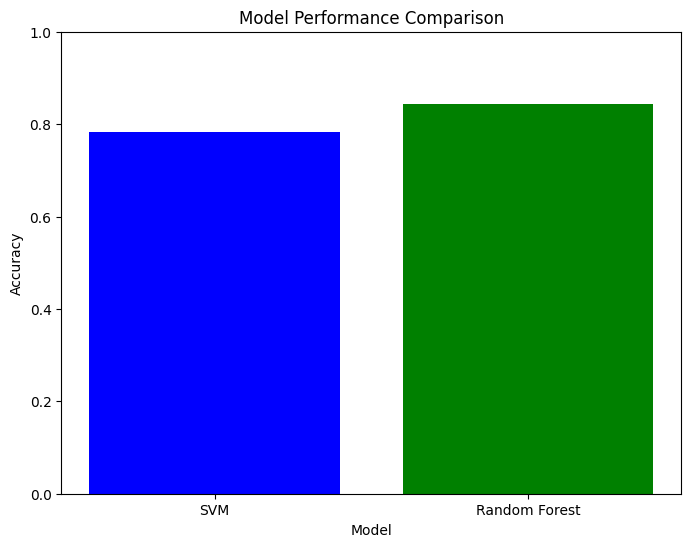

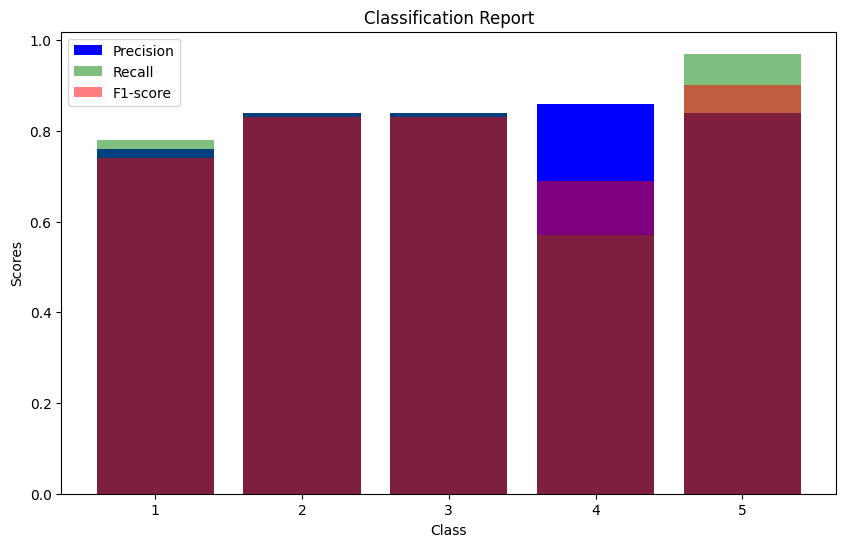

In [72]:
# Model Performance
models = ['SVM', 'Random Forest']
accuracies = [0.782, 0.843]  # Accuracy scores for SVM and Random Forest

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy percentage
plt.show()

# Classification Report
precision = [0.76, 0.84, 0.84, 0.86, 0.84]  # Precision scores for each class
recall = [0.78, 0.84, 0.84, 0.57, 0.97]  # Recall scores for each class
f1_score = [0.74, 0.83, 0.83, 0.69, 0.90]  # F1-score for each class
classes = ['1', '2', '3', '4', '5']  # Class labels

plt.figure(figsize=(10, 6))
plt.bar(classes, precision, color='blue', label='Precision')
plt.bar(classes, recall, color='green', label='Recall', alpha=0.5)
plt.bar(classes, f1_score, color='red', label='F1-score', alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Classification Report')
plt.legend()
plt.show()
